In [120]:
!pip install eli5
!pip install shap

  Using cached eli5-0.13.0.tar.gz (216 kB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=25efc6c1d436df61cc386bc30b3893aa43153e1ac79e0cbaebe656ec36a5f1cf
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\7b\26\a5\8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.



  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Set plotly template
pio.templates.default = "plotly_white"
warnings.filterwarnings('ignore')



In [5]:
df=pd.read_csv('retail_price.csv')

In [6]:
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,333.700000,807.890000,1887.322500,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.76
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.50
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.00


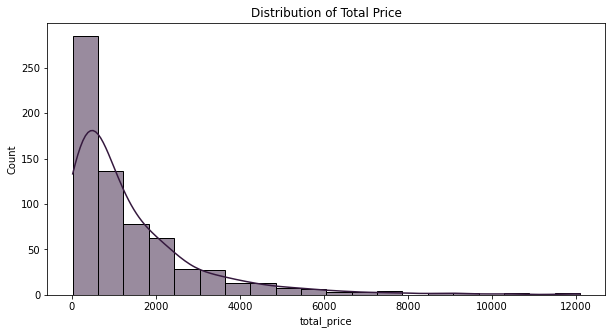

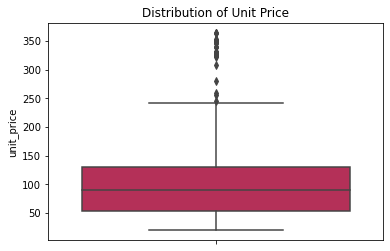

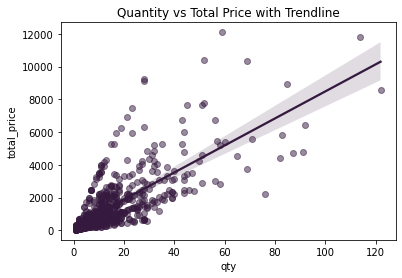

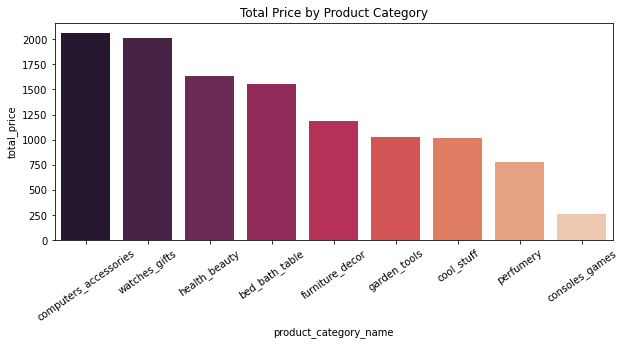

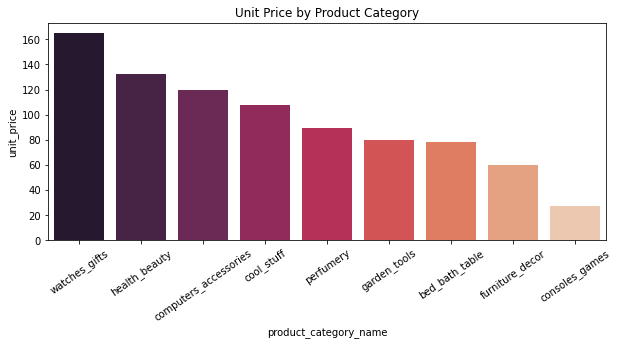

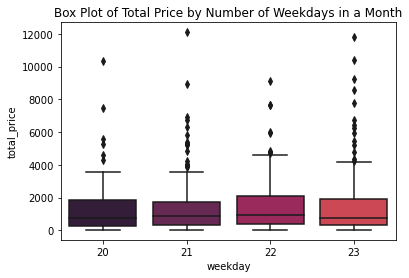

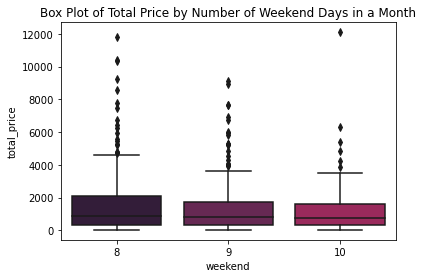

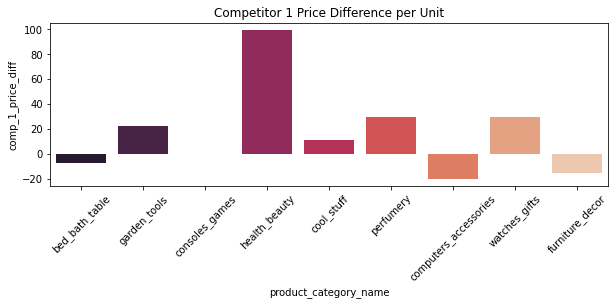

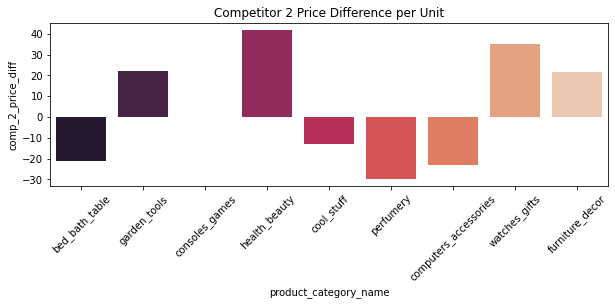

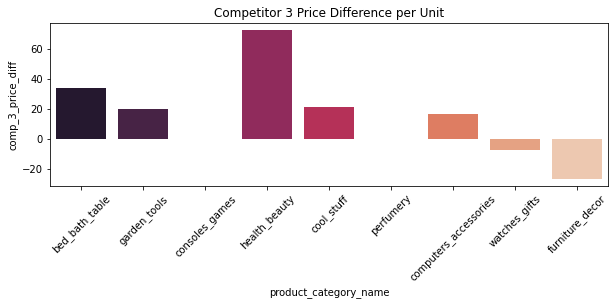

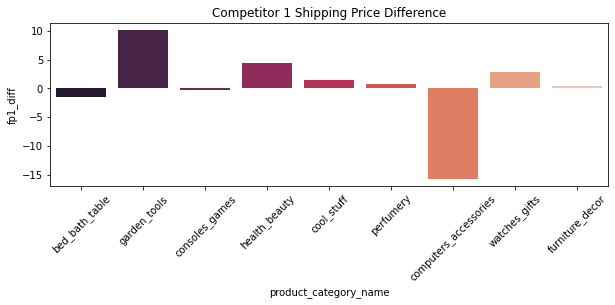

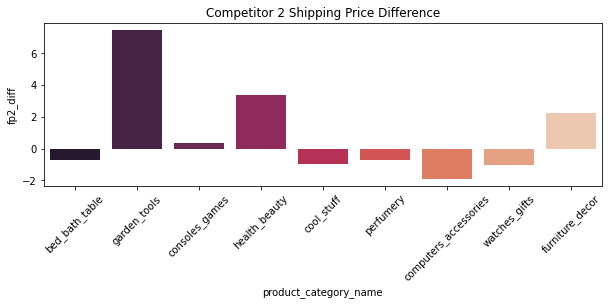

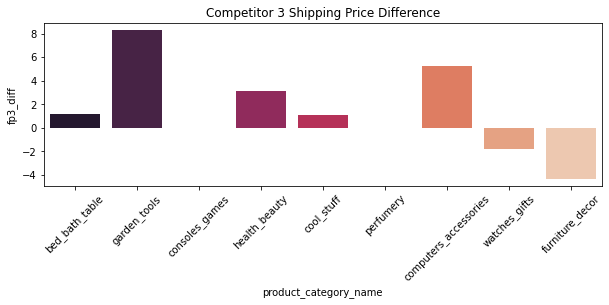

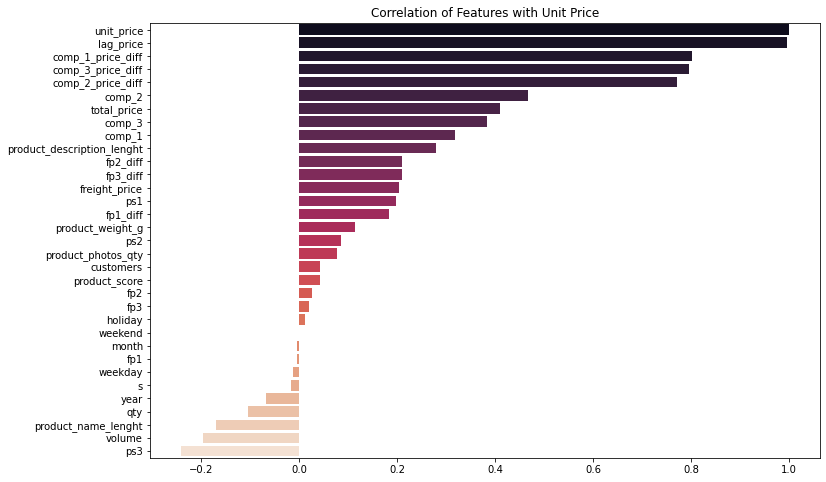

In [8]:

# Set the "rocket" color palette
sns.set_palette("rocket")

# Create subplots
plt.figure(figsize=(10, 5))

# Plot 1: Histogram of Total Price
sns.histplot(data=df, x='total_price', bins=20, kde=True, palette="rocket_r")
plt.title('Distribution of Total Price')
plt.show()

# Plot 2: Box Plot of Unit Price
sns.boxplot(data=df, y='unit_price', palette="rocket_r")
plt.title('Distribution of Unit Price')
plt.show()

# Plot 3: Scatter Plot of Quantity vs Total Price
sns.regplot(data=df, x='qty', y='total_price', scatter_kws={'alpha': 0.5})
plt.title('Quantity vs Total Price with Trendline')
plt.show()

# Plot 4: Bar Plot of Total Price by Product Category
category_order = df.groupby('product_category_name')['total_price'].mean().sort_values(ascending=False).index
plt.figure(figsize=(10, 4))  # Adjust figure size as needed
sns.barplot(data=df, x='product_category_name', y='total_price', ci=None, order=category_order, palette="rocket")
plt.title('Total Price by Product Category')
plt.xticks(rotation=35)
plt.show()

# Plot 5: Bar Plot of Unit Price by Product Category
unit_price_order = df.groupby('product_category_name')['unit_price'].mean().sort_values(ascending=False).index
plt.figure(figsize=(10, 4))  # Adjust figure size as needed
sns.barplot(data=df, x='product_category_name', y='unit_price', ci=None, order=unit_price_order, palette="rocket")
plt.title('Unit Price by Product Category')
plt.xticks(rotation=35)
plt.show()

# Plot 6: Box Plot of Total Price by Number of Weekdays
sns.boxplot(data=df, x='weekday', y='total_price')
plt.title('Box Plot of Total Price by Number of Weekdays in a Month')
plt.show()

# Plot 7: Box Plot of Total Price by Number of Weekend Days
sns.boxplot(data=df, x='weekend', y='total_price')
plt.title('Box Plot of Total Price by Number of Weekend Days in a Month')
plt.show()

# Plot 8: Bar Plot of Competitor Price Differences

for i in range(1, 4):
    plt.figure(figsize=(10, 3))
    comp = f'comp_{i}'
    df[f'{comp}_price_diff'] = df['unit_price'] - df[comp]
    price_diff = f'{comp}_price_diff'
    sns.barplot(data=df, x='product_category_name', y=price_diff, ci=None, palette="rocket")
    plt.title(f'Competitor {i} Price Difference per Unit')
    plt.xticks(rotation=45)
    
    plt.show()

# Plot 9: Bar Plot of Freight Price Differences

for i in range(1, 4):
    plt.figure(figsize=(10, 3))
    fp = f'fp{i}'
    df[f'{fp}_diff'] = df['freight_price'] - df[fp]
    fp_diff = f'{fp}_diff'
    sns.barplot(data=df, x='product_category_name', y=fp_diff, ci=None, palette="rocket")
    plt.title(f'Competitor {i} Shipping Price Difference')
    plt.xticks(rotation=45)
    
    plt.show()

# Plot 10: Correlation Analysis with Unit Price
sns.set_palette("rocket_r")
plt.figure(figsize=(12, 8))
corrs = df.corr()['unit_price'].sort_values(ascending=False)
sns.barplot(y=corrs.index, x=corrs.values, palette="rocket")
plt.title('Correlation of Features with Unit Price')
#plt.xticks(rotation=25)
plt.show()


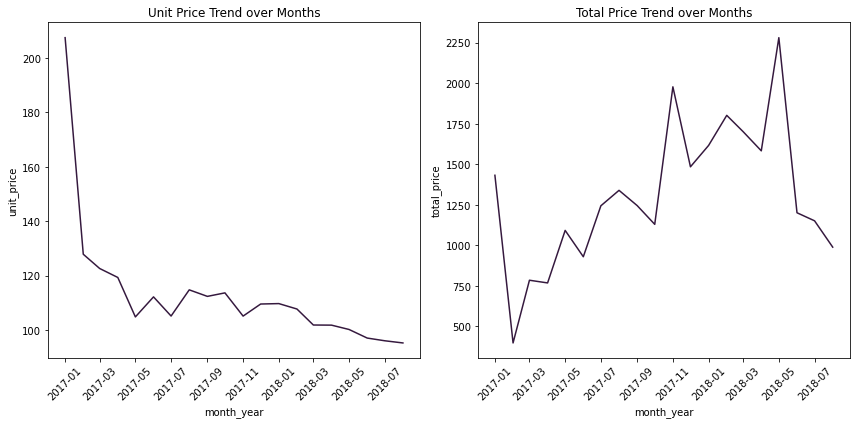

In [9]:

# Convert 'month_year' to datetime if it's not already
df['month_year'] = pd.to_datetime(df['month_year'], format='%d-%m-%Y')

# Set the "rocket" color palette
sns.set_palette("rocket")

# Create subplots
plt.figure(figsize=(12, 6))

# Plot 1: Univariate trendline for Unit Price using lineplot
plt.subplot(1, 2, 1)
sns.lineplot(data=df, x='month_year', y='unit_price', ci=None, palette="rocket_r")
plt.title('Unit Price Trend over Months')
plt.xticks(rotation=45)

# Plot 2: Univariate trendline for Total Price using lineplot
plt.subplot(1, 2, 2)
sns.lineplot(data=df, x='month_year', y='total_price', ci=None, palette="rocket")
plt.title('Total Price Trend over Months')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [10]:
monthly_df = df.groupby(by='month_year').agg({
    'unit_price': 'mean', 'total_price': 'sum', 'freight_price': 'sum',
    'qty': 'sum', 'weekday': 'sum', 'weekend': 'sum', 'customers': 'sum'
}).reset_index()
monthly_df['month_year'] = pd.to_datetime(monthly_df['month_year'], format='%d-%m-%Y')
monthly_df = monthly_df.sort_values(by='month_year')
monthly_df.head()

,month_year,unit_price,total_price,freight_price,qty,weekday,weekend,customers
0,2017-01-01,207.445000,2864.19,33.961250,9,44,18,18
1,2017-02-01,127.827143,3584.11,217.847838,35,180,72,78
2,2017-03-01,122.586615,10204.38,282.314965,101,299,104,242
3,2017-04-01,119.288667,11524.62,335.440132,121,300,150,309
4,2017-05-01,104.785769,21843.33,393.828633,222,460,160,803


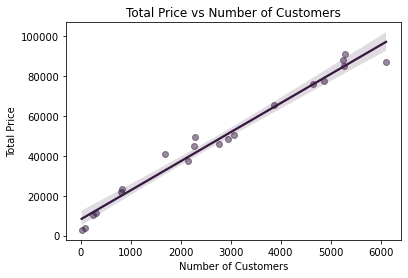

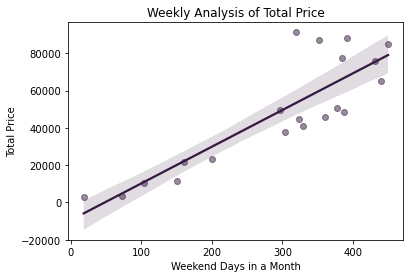

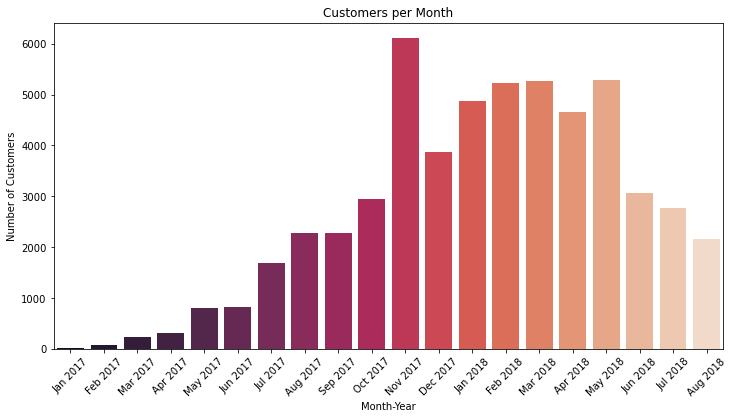

In [11]:
sns.set_palette("rocket")

# Create subplots

# Plot 1: Scatter Plot of Total Price vs Number of Customers

sns.regplot(data=monthly_df, x='customers', y='total_price', scatter_kws={'alpha': 0.5})
plt.title('Total Price vs Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Total Price')
plt.show()

# Plot 2: Scatter Plot of Weekly Analysis of Total Price

sns.regplot(data=monthly_df, x='weekend', y='total_price', scatter_kws={'alpha': 0.5})
plt.title('Weekly Analysis of Total Price')
plt.xlabel('Weekend Days in a Month')
plt.ylabel('Total Price')
plt.show()

# Plot 3: Bar Plot of Customers per Month
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_df, x=monthly_df['month_year'].dt.strftime('%b %Y'), y='customers', palette="rocket")
plt.title('Customers per Month')
plt.xlabel('Month-Year')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Aggregating data by month
monthly_df = df.groupby(by='month_year').agg({
    'unit_price': 'mean', 'total_price': 'sum', 'freight_price': 'sum',
    'qty': 'sum', 'weekday': 'sum', 'weekend': 'sum', 'customers': 'sum'
}).reset_index()

# Convert 'month_year' to datetime if not already
monthly_df['month_year'] = pd.to_datetime(monthly_df['month_year'], format='%d-%m-%Y')
monthly_df = monthly_df.sort_values(by='month_year')
monthly_df.head()

# Feature engineering on mean and sum dataframes
# Example: Calculate price differences between competitors (comp1_diff, comp2_diff, comp3_diff)
# Create 'X' with features and 'y' with target variable

,month_year,unit_price,total_price,freight_price,qty,weekday,weekend,customers
0,2017-01-01,207.445000,2864.19,33.961250,9,44,18,18
1,2017-02-01,127.827143,3584.11,217.847838,35,180,72,78
2,2017-03-01,122.586615,10204.38,282.314965,101,299,104,242
3,2017-04-01,119.288667,11524.62,335.440132,121,300,150,309
4,2017-05-01,104.785769,21843.33,393.828633,222,460,160,803


In [13]:
df['month_year'] = pd.to_datetime(df['month_year'], format='%d-%m-%Y')
df['month'] = df['month_year'].dt.month
df['year'] = df['month_year'].dt.year

# Creating a new feature 'revenue' based on 'total_price' and 'qty'
df['revenue'] = df['total_price'] * df['qty']

# Creating dummy variables for 'product_category_name'
df = pd.get_dummies(df, columns=['product_category_name'], drop_first=True)

# Selecting relevant features for modeling
selected_features = [
    'unit_price', 'freight_price', 'product_score', 'product_photos_qty',
    'product_weight_g', 'customers', 'weekday', 'weekend', 'holiday',
    'month', 'year', 'revenue'
]

df = df[selected_features]

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('unit_price', axis=1)  # Features
y = df['unit_price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, you have X_train, X_test, y_train, and y_test ready for modeling.

In [15]:
models = [
    ('Ridge Regression', Ridge(alpha=1.0)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Support Vector Machine', SVR(kernel='linear')),
    ('K-Nearest Neighbors', KNeighborsRegressor(n_neighbors=5)),
    ('K-Nearest Neighbors1', KNeighborsRegressor(n_neighbors=8)),
    ('XGBoost', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
]



In [16]:
# Train and evaluate each model
results = []
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    results.append({'Model': name, 'MAE': mae, 'R2': r2})



In [17]:
import tabulate

# Assuming you have the 'results' DataFrame

# Create a DataFrame to compare model results
model_comparison_df = pd.DataFrame(results)

# Display the model comparison table in a presentable format
print(tabulate.tabulate(model_comparison_df, headers='keys', tablefmt='fancy_grid'))


╒════╤════════════════════════╤═══════════╤═══════════════╕
│    │ Model                  │       MAE │            R2 │
╞════╪════════════════════════╪═══════════╪═══════════════╡
│  0 │ Ridge Regression       │  55.2381  │     0.0240185 │
├────┼────────────────────────┼───────────┼───────────────┤
│  1 │ Random Forest          │   7.13627 │     0.975064  │
├────┼────────────────────────┼───────────┼───────────────┤
│  2 │ Support Vector Machine │ 708.452   │ -1077.44      │
├────┼────────────────────────┼───────────┼───────────────┤
│  3 │ K-Nearest Neighbors    │  57.6042  │    -0.167967  │
├────┼────────────────────────┼───────────┼───────────────┤
│  4 │ K-Nearest Neighbors1   │  52.3418  │     0.0515899 │
├────┼────────────────────────┼───────────┼───────────────┤
│  5 │ XGBoost                │   6.96712 │     0.977039  │
╘════╧════════════════════════╧═══════════╧═══════════════╛


                    Model         MAE           R2
0        Ridge Regression   55.238095     0.024018
1           Random Forest    7.136273     0.975064
2  Support Vector Machine  708.452185 -1077.437989
3     K-Nearest Neighbors   57.604218    -0.167967
4                 XGBoost    6.967116     0.977039


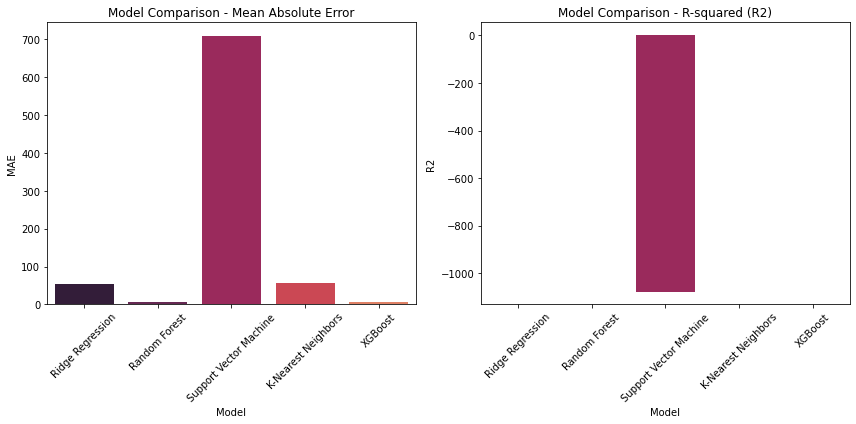

In [99]:
sns.set_palette("rocket")

# Create a DataFrame to compare model results
model_comparison_df = pd.DataFrame(results)

# Print and visualize model comparison
print(model_comparison_df)

# Create subplots using Seaborn
plt.figure(figsize=(12, 6))

# Plot 1: Model Comparison - Mean Absolute Error
plt.subplot(1, 2, 1)
sns.barplot(data=model_comparison_df, x='Model', y='MAE')
plt.title('Model Comparison - Mean Absolute Error')
plt.xticks(rotation=45)

# Plot 2: Model Comparison - R-squared (R2)
plt.subplot(1, 2, 2)
sns.barplot(data=model_comparison_df, x='Model', y='R2')
plt.title('Model Comparison - R-squared (R2)')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [119]:
import plotly.graph_objects as go

# Instantiate and train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=50, random_state=40)
model.fit(X, y)

# Make predictions on the same data used for training (you should ideally use a separate test dataset)
y_pred = model.predict(X)

# Create a scatter plot to visualize predicted vs. actual retail unit price
fig = go.Figure()

# Add a scatter plot for actual vs. predicted values with indigo markers
fig.add_trace(go.Scatter(x=y, y=y_pred, mode='markers', 
                         marker=dict(color='indigo'),
                         name='Predicted vs. Actual Retail Unit Price'))

# Add a diagonal line for ideal prediction with deep pink color
fig.add_trace(go.Scatter(x=[min(y), max(y)], y=[min(y), max(y)], 
                         mode='lines', 
                         marker=dict(color='lightcoral'),
                         name='Ideal Prediction'))

# Customize the layout of the plot
fig.update_layout(
    title='Predicted vs. Actual Retail Price',
    xaxis_title='Actual Retail Price',
    yaxis_title='Predicted Retail Price'
)

# Show the plot
fig.show()


In [122]:
import shap
import eli5
from eli5.sklearn import PermutationImportance

# Fit Permutation Importance to the model
perm = PermutationImportance(model, random_state=1).fit(X, y)

# Display feature importances
sns.set_palette("rocket")
eli5.show_weights(perm, feature_names=X.columns.tolist())

Weight,Feature
1.2518 ± 0.0841,product_weight_g
0.3705 ± 0.0310,product_photos_qty
0.1044 ± 0.0135,product_score
0.0783 ± 0.0133,freight_price
0.0148 ± 0.0032,customers
0.0064 ± 0.0017,year
0.0064 ± 0.0018,revenue
0.0028 ± 0.0003,month
0.0015 ± 0.0006,holiday
0.0003 ± 0.0001,weekday


In [139]:
# Add predicted unit prices and errors to the 'df' DataFrame
from tabulate import tabulate
df['unit_price_pred'] = y_pred
df['error'] = abs(df['unit_price'] - df['unit_price_pred'])

preview_df = df[['unit_price', 'unit_price_pred', 'error']].sample(n=10)# Change 'n' to the number of rows you want to display10
print("Preview of Random Rows with 'unit_price', 'unit_price_pred', and 'error' columns:")
print(preview_df)

print(tabulate(preview_df, headers='keys', tablefmt='fancy_grid', showindex=False))

# Find the largest and smallest prediction errors
largest_error = df[df['error'] == max(df['error'])]
smallest_error = df[df['error'] == min(df['error'])]

Preview of Random Rows with 'unit_price', 'unit_price_pred', and 'error' columns:
     unit_price  unit_price_pred         error
657   79.800000        81.326709  1.526709e+00
218  149.000000       150.092698  1.092698e+00
128   89.990000        88.886760  1.103240e+00
505   89.900000        95.487800  5.587800e+00
8     39.990000        39.900000  9.000000e-02
527   38.400000        37.723486  6.765143e-01
343  349.900000       350.182000  2.820000e-01
340  349.900000       349.900000  1.136868e-13
273  149.000000       147.820944  1.179056e+00
662   44.154444        46.141911  1.987467e+00
╒══════════════╤═══════════════════╤═════════════╕
│   unit_price │   unit_price_pred │       error │
╞══════════════╪═══════════════════╪═════════════╡
│      79.8    │           81.3267 │ 1.52671     │
├──────────────┼───────────────────┼─────────────┤
│     149      │          150.093  │ 1.0927      │
├──────────────┼───────────────────┼─────────────┤
│      89.99   │           88.8868 │ 1.10324

# Interpret the largest prediction error
data_for_prediction = largest_error.drop(['unit_price', 'unit_price_pred', 'error'], axis=1)
print("-------------------- LARGEST ERROR PREDICTION --------------------\n\n")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], data_for_prediction)


#Interpret the smallest prediction error
data_for_prediction = smallest_error.drop(['unit_price', 'unit_price_pred', 'error'], axis=1)
print("-------------------- SMALLEST ERROR PREDICTION --------------------\n\n")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], data_for_prediction)


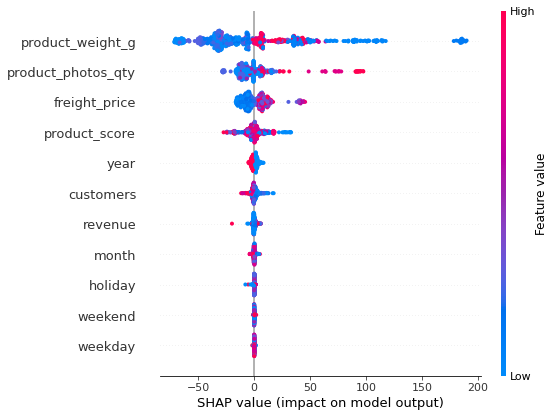

In [130]:
# Overall feature importance summary plot
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)